# Cálculo promedio de remuneración UNRC

Según datos oficiales extraídos del sistema de información de la UNRC y declaraciones públicas varias.

Se extrae de **Recursos humanos UNRC**: [Estadísticas Sireh](https://sisinfo.unrc.edu.ar/estadisticas/estadisticas_sireh.php) la cantidad de personal clasificados según *categoría* y *horas semanales*:

**AUTORIDADES**

| **Dedicación**        | Exclusiva | Simple | Tiempo Completo | Tiempo Parcial |
|-----------------------|-----------|--------|-----------------|----------------|
| **Cantidad personas** | 41        | 39     | 2               | 1              |
| **Horas semanales**   | 40        | 20     | 40              | 20             |

**DOCENTES**

| **Dedicación**        | Exclusiva | Otra | Semi-Exclusiva | Simple |
|-----------------------|-----------|------|----------------|--------|
| **Cantidad personas** | 705       | 171  | 581            | 418    |
| **Horas semanales**   | 40        | 20   | 20             | 10     |

**NO DOCENTES**

| **Categoría**         | C1 | C2 | C3  | C4  | C5  | C6 | C7  |
|-----------------------|----|----|-----|-----|-----|----|-----|
| **Cantidad personas** | 16 | 45 | 110 | 104 | 144 | 49 | 122 |
| **Horas semanales**   | 40 | 40 | 40  | 40  | 40  | 40 | 40  |

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

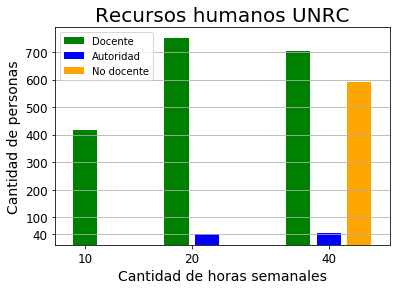

In [3]:
x = [0, 3, 4, 7, 8, 9]
y = [418, 752, 40, 705, 43, 590]
colors = ['green', 'green', 'blue', 'green', 'blue', 'orange']

bars = plt.bar(x, y, color=colors)
plt.xticks([0, 3.5, 8], [10, 20, 40], fontsize=12)
plt.yticks([40] + list(range(100, 800, 100)), fontsize=12)
plt.xlim(-1, 10)
plt.xlabel('Cantidad de horas semanales', fontsize=14)
plt.ylabel('Cantidad de personas', fontsize=14)
plt.title('Recursos humanos UNRC', fontsize=20)
plt.legend([bars[0], bars[2], bars[-1]], ['Docente', 'Autoridad', 'No docente'])
#plt.hlines(40, -1, 7.6, linestyles='--', alpha=0.3)
plt.grid(axis='y')

plt.savefig('../content/img/rrhh_unrc.png', dpi=100, bbox_inches='tight')

El sitio oficial de la UNRC **no publica** presupuesto para 2018, la última publicación al respecto data de 2016 *([Presupuesto UNRC](https://www.unrc.edu.ar/unrc/presupuesto.php))*. Una [noticia de puntal](http://www.puntal.com.ar/noticia/UNRC-el-presupuesto-para-2018-crece-25-y-llega-a--1.478-millones-20170920-0017.html) informa el monto de **$1.478** millones para el presupuesto 2018.

Según declaraciones públicas de autoridades de la UNRC en una [nota](https://www.unrc.edu.ar/unrc/n_comp.cdc?nota=32358) en el sitio oficial: **"*Los gastos de funcionamiento, que insumen entre el 10 y el 15 por ciento del presupuesto de la UNRC (el resto es para sueldos) fueron otro de los tópicos.*"**

Para un **85%** del presupuesto destinado a sueldos **(aproximadamente $1200 millones)**, se calcula un promedio por hora y así la supuesta remuneración por personal según su dedicación:

In [4]:
presupuesto_2018 = 1_478_000_000
presupuesto_sueldos_2018 = presupuesto_2018 * 0.85
total_horas = 3803800

In [5]:
pago_hora = presupuesto_sueldos_2018 / total_horas

In [6]:
pago_hora

330.274988169725

In [7]:
pago_semana = []
pago_mes = []
horas = [10, 20, 30, 40]
for hora in horas:
    semana = round(hora * pago_hora, 2)
    pago_semana.append(semana)
    mes = round(4 * hora * pago_hora, 2)
    pago_mes.append(mes)

In [8]:
print(pago_semana)
print(pago_mes)

[3302.75, 6605.5, 9908.25, 13211.0]
[13211.0, 26422.0, 39633.0, 52844.0]


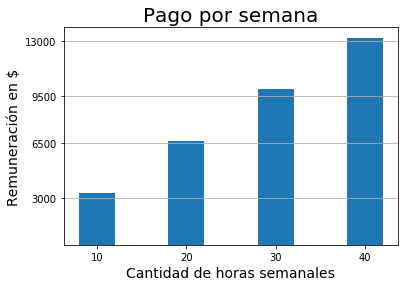

In [9]:
x = [10, 20, 30, 40]
y1 = pago_semana
y2 = pago_mes
#colors = ['green', 'green', 'blue', 'green', 'blue', 'orange']

bars = plt.bar(x, y1, width=4)#, color=colors)
#plt.xlim(-1, 45)
plt.xlabel('Cantidad de horas semanales', fontsize=14)
plt.ylabel('Remuneración en $', fontsize=14)
plt.title('Pago por semana', fontsize=20)
#plt.legend([bars[0], bars[2], bars[-1]], ['Docente', 'Autoridad', 'No docente'])
plt.xticks([10, 20, 30, 40])
plt.yticks([3000, 6500, 9500, 13000])


plt.grid(axis='y')
plt.savefig('../content/img/pago_semanal.png', dpi=100, bbox_inches='tight')

| Horas semanales  | 10       | 20       | 30       | 40       |
|------------------|----------|----------|----------|----------|
| **Pago mensual** | \$13211.0 | \$26422.0 | \$39633.0 | \$52844.0 |

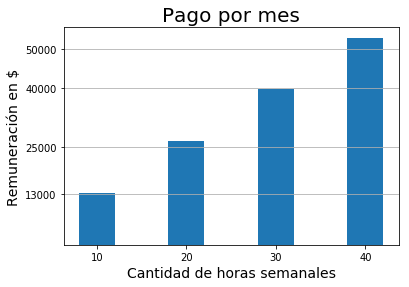

In [10]:
bars = plt.bar(x, y2, width=4)#, color=colors)
#plt.xlim(-1, 45)
plt.xlabel('Cantidad de horas semanales', fontsize=14)
plt.ylabel('Remuneración en $', fontsize=14)
plt.title('Pago por mes', fontsize=20)
#plt.legend([bars[0], bars[2], bars[-1]], ['Docente', 'Autoridad', 'No docente'])
plt.xticks([10, 20, 30, 40])
plt.yticks([13000, 25000, 40000, 50000])
plt.grid(axis='y')

plt.savefig('../content/img/pago_mensual.png', dpi=100, bbox_inches='tight')

In [21]:
# Cantidad de personas por dedicación exclusiva, semi-exclusiva, simple
autoridades = [43, 1, 40]
docentes = [705, 581, 418+171]
no_docentes = [16, 45, 110, 104, 144, 49, 122]
# Remuneración por dedicación/categoría
exclusiva_max = 77_410
exclusiva_promedio = (77_410 + 42_335) / 2

semi_exclusiva_max = 38_689
semi_exclusiva_promedio = (38_689 + 21_152) / 2

simple_max = 19_326
simple_promedio = (19_326 + 10_557) / 2


cat_no_docentes_max = [
    52699 + 3074 + 10540 + 13175 + 527 + 5270 + 13649,
    43916 + 3074 + 8783 + 10979 + 439 + 4391 + 6148,
    36538 + 3074 + 7307 + 9134 + 365 + 3653 + 5164,
    30390 + 3074 + 6078 + 7597 + 607 + 3039 + 4304,
    25296 + 500 + 3074 + 5059 + 6324 + 505 +2529 + 3566,
    21079 + 2500 + 3074 + 4216 + 5270 + 421 + 2108 + 2951,
    17566 + 2500 + 3074 + 3513 + 4391 + 351 + 1756 + 2459
]
cat_no_docentes_promedio = [
    52699 + 3074 + 10540 + 13175 + 527 + 5270 + ((13649 + 1949)/2),
    43916 + 3074 + 8783 + 10979 + 439 + 4391 + ((6148 + 878)/2),
    36538 + 3074 + 7307 + 9134 + 365 + 3653 + ((5164 + 737) /2),
    30390 + 3074 + 6078 + 7597 + 607 + 3039 + ((4304 + 614) / 2),
    25296 + 500 + 3074 + 5059 + 6324 + 505 +2529 + ((3566 + 509) /2),
    21079 + 2500 + 3074 + 4216 + 5270 + 421 + 2108 + ((2951 + 421) /2),
    17566 + 2500 + 3074 + 3513 + 4391 + 351 + 1756 + ((2459 + 351) /2)
]

In [22]:
remuneracion_autoridades_max = []
remuneracion_autoridades_promedio = []

remuneracion_docentes_max = []
remuneracion_docentes_promedio = []

remuneracion_no_docentes_max = []
remuneracion_no_docentes_promedio = []

In [23]:
# Aproximación para remuneración mensual promedio
remuneracion_autoridades_promedio.append(autoridades[0] * exclusiva_promedio * 12)
remuneracion_autoridades_promedio.append(autoridades[1] * semi_exclusiva_promedio * 12)
remuneracion_autoridades_promedio.append(autoridades[2] * simple_promedio * 12)

remuneracion_docentes_promedio.append(docentes[0] * exclusiva_promedio * 12)
remuneracion_docentes_promedio.append(docentes[1] * semi_exclusiva_promedio * 12)
remuneracion_docentes_promedio.append(docentes[2] * simple_promedio * 12)
    
for i, cant in enumerate(no_docentes):
    remuneracion_no_docentes_promedio.append(cant * cat_no_docentes_promedio[i] * 12)
    
total_autoridades = sum(remuneracion_autoridades_promedio)
total_docentes = sum(remuneracion_docentes_promedio)
total_no_docentes = sum(remuneracion_no_docentes_promedio)

print('Total autoridades: $', total_autoridades)
print('Total docentes: $', total_docentes)
print('Total no docentes: $', total_no_docentes)

total_sueldos = total_autoridades + total_docentes + total_no_docentes
print('Total sueldos: $', total_sueldos)

presupuesto_2018 = 1_478_000_000
presupuesto_sueldos_2018 = presupuesto_2018 * 0.85
print(f'Presupuesto sueldos 2018: $ {presupuesto_sueldos_2018}')

resto = presupuesto_sueldos_2018 - total_sueldos
print('Resto: $', resto)

Total autoridades: $ 38425176.0
Total docentes: $ 820733598.0
Total no docentes: $ 360699192.0
Total sueldos: $ 1219857966.0
Presupuesto sueldos 2018: $ 1256300000.0
Resto: $ 36442034.0


In [24]:
def div(a):
    return a/1_000_000

In [25]:
y0 = [total_autoridades, total_docentes, total_no_docentes, resto]
y1 = [presupuesto_sueldos_2018]
y0 = list(map(div, y0))
y1 = list(map(div, y1))
#y_millones = list(map(div, y))
#y_millones

IndexError: tuple index out of range

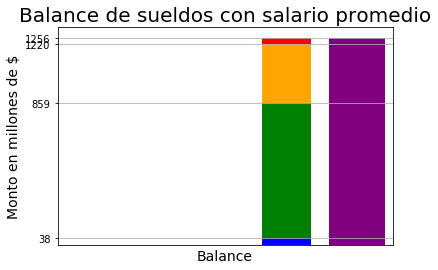

In [26]:
y0_cum = np.cumsum(y0)
y0_cum_shift = np.zeros_like(y0_cum)
y0_cum_shift[1:] = y0_cum[:-1]
colors = ['b', 'g', 'orange', 'r']
bars0 = plt.bar(x=0, height=y0, width=0.7, bottom=y0_cum_shift, color=colors)
bars1 = plt.bar(x=1, height=y1, color=['purple'])

plt.xlim(-3.25, 1.5)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Monto en millones de $', fontsize=14)
plt.title('Balance de sueldos con salario promedio', fontsize=20)

plt.yticks(y0_cum)
plt.xticks([])

plt.grid(axis='y')

plt.legend([bars[0], bars[1], bars[2], bars[3], bars[4]], 
           ['Autoridad', 'Docente', 'No docente', 'Presupuesto para sueldos 2018', 'Resto'])
plt.savefig('../content/img/balance_promedio.png', dpi=100, bbox_inches='tight')
plt.show()

In [18]:
# Aproximación para remuneración mensual maximo
remuneracion_autoridades_max.append(autoridades[0] * exclusiva_max * 12)
remuneracion_autoridades_max.append(autoridades[1] * semi_exclusiva_max * 12)
remuneracion_autoridades_max.append(autoridades[2] * simple_max * 12)

remuneracion_docentes_max.append(docentes[0] * exclusiva_max * 12)
remuneracion_docentes_max.append(docentes[1] * semi_exclusiva_max * 12)
remuneracion_docentes_max.append(docentes[2] * simple_max * 12)
    
for i, cant in enumerate(no_docentes):
    remuneracion_no_docentes_max.append(cant * cat_no_docentes_max[i] * 12)
    
total_autoridades = sum(remuneracion_autoridades_max)
total_docentes = sum(remuneracion_docentes_max)
total_no_docentes = sum(remuneracion_no_docentes_max)

print('Total autoridades: $', total_autoridades)
print('Total docentes: $', total_docentes)
print('Total no docentes: $', total_no_docentes)

total_sueldos = total_autoridades + total_docentes + total_no_docentes
print('Total sueldos: $', total_sueldos)

presupuesto_2018 = 1_478_000_000
presupuesto_sueldos_2018 = presupuesto_2018 * 0.85
print(f'Presupuesto sueldos 2018: $ {presupuesto_sueldos_2018}')

resto = presupuesto_sueldos_2018 - total_sueldos
print('Resto: $', resto)

Total autoridades: $ 49684308
Total docentes: $ 1061224476
Total no docentes: $ 371477796
Total sueldos: $ 1482386580
Presupuesto sueldos 2018: $ 1256300000.0
Resto: $ -226086580.0


In [19]:
colors

['b', 'g', 'orange', 'r']

IndexError: tuple index out of range

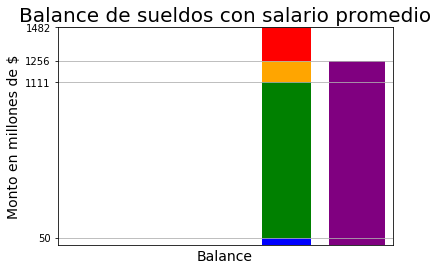

In [20]:
y0 = [total_autoridades, total_docentes, total_no_docentes, resto]
y1 = [presupuesto_sueldos_2018]
y0 = list(map(div, y0))
y1 = list(map(div, y1))
#y_millones = list(map(div, y))
#y_millones

y0_cum = np.cumsum(y0)
y0_cum_shift = np.zeros_like(y0_cum)
y0_cum_shift[1:] = y0_cum[:-1]
colors = ['b', 'g', 'orange', 'r']
bars0 = plt.bar(x=0, height=y0, width=0.7, bottom=y0_cum_shift, color=colors)
bars1 = plt.bar(x=1, height=y1, color=['purple'])

plt.xlim(-3.25, 1.5)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Monto en millones de $', fontsize=14)
plt.title('Balance de sueldos con salario promedio', fontsize=20)

plt.yticks(y0_cum)
plt.xticks([])

plt.grid(axis='y')

plt.legend([bars[0], bars[1], bars[2], bars[3], bars[4]], 
           ['Autoridad', 'Docente', 'No docente', 'Presupuesto para sueldos 2018', 'Resto'])
plt.savefig('../content/img/balance_maximo.png', dpi=100, bbox_inches='tight')
plt.show()